<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

In [3]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [4]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## Cleaning up data prior to analysis

In [5]:
# Creating a rating feature from star_rating using only numbers and changing type from string to float.

shops['rating'] = shops['star_rating'].apply(lambda x: x[:4]).astype('float')
del shops['star_rating']

# Checking to make sure it worked.

shops.head()

,coffee_shop_name,full_review_text,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [6]:
# Creating a date feature from dates I stripped from full_review_text column

shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])

shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,12/3/2016


In [7]:
# Dropping data from full_review_text by splittinging and indexing past the date and then 
# rejoining with a space

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [8]:
# Changing data in full_review_text column to all lower case letters

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4.0,12/3/2016


In [9]:
# Convert date column to Pandas datetime

shops['date'] = pd.to_datetime(shops['date'])
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! eve...,5.0,2016-11-25
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4.0,2016-12-02
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the ...,4.0,2016-11-30
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2.0,2016-11-25
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4.0,2016-12-03


### ***Lemmatizaion function and tokenization, removes stop word, punctuation and pronouns.***

In [10]:
# Instantiate spaCy english library
nlp = spacy.load('en_core_web_lg')

In [11]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)

    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [12]:
# Making a new column for base tokens prior to using more of spaCy's tools.
shops['tokens'] = shops['full_review_text'].apply(get_lemmas)
shops['tokens'].head()

0    [1, check, love, love, love, atmosphere, corne...
1    [list, date, night, austin, ambiance, austin, ...
2    [1, check, list, brunch, spot, love, eclectic,...
3    [cool, decor, good, drink, nice, seating, over...
4    [1, check, locate, northcross, mall, shopping,...
Name: tokens, dtype: object

In [13]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,1 check-in love love loved the atmosphere! eve...,"[1, check, love, love, love, atmosphere, corne..."
1,"listed in date night: austin, ambiance in aust...","[list, date, night, austin, ambiance, austin, ..."
2,1 check-in listed in brunch spots i loved the ...,"[1, check, list, brunch, spot, love, eclectic,..."
3,very cool decor! good drinks nice seating howe...,"[cool, decor, good, drink, nice, seating, over..."
4,1 check-in they are located within the northcr...,"[1, check, locate, northcross, mall, shopping,..."
5,1 check-in very cute cafe! i think from the mo...,"[1, check, cute, cafe, think, moment, step, fi..."
6,"2 check-ins listed in ""nuptial coffee bliss!"",...","[2, check, in, list, nuptial, coffee, bliss, a..."
7,2 check-ins love this place! 5 stars for clean...,"[2, check, in, love, place, 5, star, cleanline..."
8,"1 check-in ok, let's try this approach... pros...","[1, check, ok, let, try, approach, pro, music,..."
9,3 check-ins this place has been shown on my so...,"[3, check, in, place, show, social, medium, da..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
# re-created fuction from lecture which takes a corpus of document and returns and dataframe of word counts for us to analyze.

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with 
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [15]:
# Use the Function 
wc = count(shops['tokens'])
print(wc.shape)
wc.head()

(14661, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,coffee,4953,10763,1.0,0.029758,0.029758,0.650341
120,place,3892,6059,2.0,0.016752,0.046511,0.511029
146,good,3606,5421,3.0,0.014988,0.061499,0.473477
116,great,2860,3959,4.0,0.010946,0.072445,0.375525
13,check,3174,3468,5.0,0.009589,0.082034,0.416754


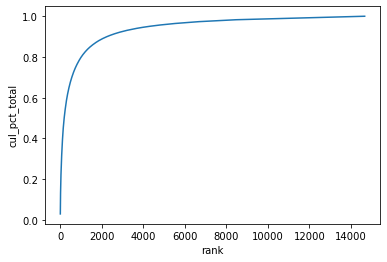

In [16]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [17]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.3859506028793328

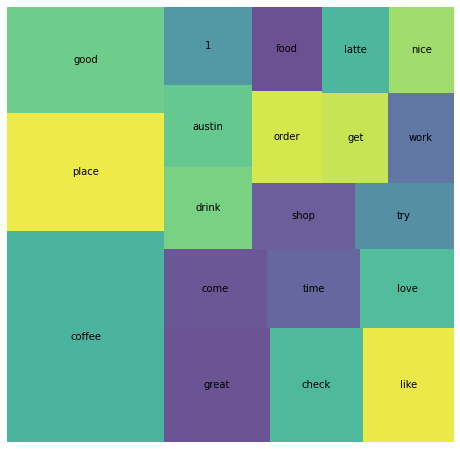

In [18]:
# Visualizing the top 20 word count

wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Visualizing the star rating

### A 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings.

### A 'good' coffee shop is a 4 or 5.


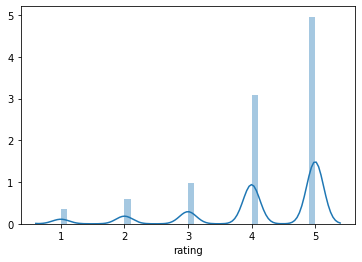

In [19]:
## The plot shows that the majority of ratings were good.
sns.distplot(shops['rating']);

In [25]:
# Setting variable for "bad" coffee shops

wc_bad = count(shops[shops['rating'] <= 3]['tokens'])
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1,coffee,951,2212,1.0,0.027947,0.027947,0.644309
29,place,756,1232,2.0,0.015566,0.043513,0.512195
12,good,649,1004,3.0,0.012685,0.056198,0.439702
27,like,596,945,4.0,0.011940,0.068137,0.403794
70,order,433,759,5.0,0.009590,0.077727,0.293360


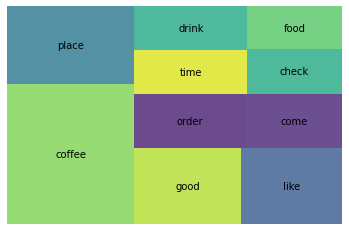

In [36]:
# Word Cloud (top 10) for Comments for coffee shops rated 'bad'

wc_top10_bad = wc_bad[wc_bad['rank'] <= 10]

squarify.plot(sizes=wc_top10_bad['pct_total'], label=wc_top10_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [37]:
# Setting variable for 'good' coffee shops

wc_good = count(shops[shops['rating'] >= 4]['tokens'])

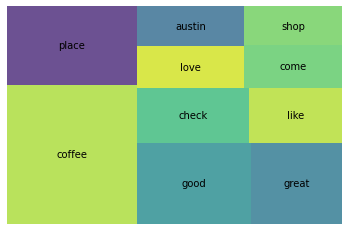

In [38]:
# Word Cloud (top 10) for Comments for coffee shops rated 'good'

wc_top10_good = wc_good[wc_good['rank'] <= 10]

squarify.plot(sizes=wc_top10_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [41]:
# Outer Join on word the wc tables for coffee shops that rate 'good' and those that rate 'bad'

diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct']], on='word', how='outer', suffixes=('', '_bad'))
diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,coffee,0.651792,0.644309
1,place,0.510749,0.512195
2,good,0.481596,0.439702
3,great,0.409121,0.235772
4,check,0.437459,0.330623


In [43]:
# Make a df that shows the difference betwee words that appear in both groups

diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']
diff.sort_values(by='diff')[:10]

,word,appears_in_pct,appears_in_pct_bad,diff
5,like,0.273290,0.403794,-0.130504
20,order,0.165472,0.293360,-0.127888
145,ask,0.050651,0.149051,-0.098400
34,service,0.141042,0.235095,-0.094053
207,bad,0.038111,0.132114,-0.094003
27,go,0.140879,0.228320,-0.087440
50,taste,0.106678,0.191057,-0.084379
90,$,0.064169,0.147696,-0.083527
165,customer,0.044951,0.126016,-0.081065
156,say,0.047231,0.126016,-0.078785


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

